# Exercise 03 : Bar charts

## Import

In [1]:
import pandas as pd
import sqlite3

## Connect to database

In [2]:
db_connect = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## Get all commit datetimes from `checker` table

In [3]:
sql_query = """
SELECT
    timestamp as datetime
FROM
    checker
WHERE
    uid LIKE 'user_%'
"""

commits_datetimes_df = pd.read_sql(sql=sql_query, con=db_connect, parse_dates=['datetime'])
commits_datetimes_df.head()

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [4]:
commits_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


## Get day type (weekend or working day)

In [5]:
commits_datetimes_df['date'] = commits_datetimes_df.datetime.dt.date
commits_datetimes_df['hour'] = commits_datetimes_df.datetime.dt.hour
commits_datetimes_df['daytype'] = commits_datetimes_df['datetime'].dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')
commits_datetimes_df.head()

,datetime,date,hour,daytype
0,2020-04-17 05:19:02.744528,2020-04-17,5,working_day
1,2020-04-17 05:22:35.249331,2020-04-17,5,working_day
2,2020-04-17 05:22:45.549397,2020-04-17,5,working_day
3,2020-04-17 05:34:14.691200,2020-04-17,5,working_day
4,2020-04-17 05:34:24.422370,2020-04-17,5,working_day


In [6]:
commits_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3207 non-null   datetime64[ns]
 1   date      3207 non-null   object        
 2   hour      3207 non-null   int64         
 3   daytype   3207 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 100.3+ KB


## Get average counts per hour

In [7]:
commits_groupped = commits_datetimes_df.groupby(['daytype', 'date', 'hour']).count()
commits_groupped = commits_groupped.groupby(['daytype', 'hour']).mean().reset_index()

pivot_table = pd.pivot(commits_groupped, values='datetime', index='hour', columns='daytype')
pivot_table.fillna(0, inplace=True)
pivot_table

daytype,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,0.000000
3,1.000000,2.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


## Create a graph

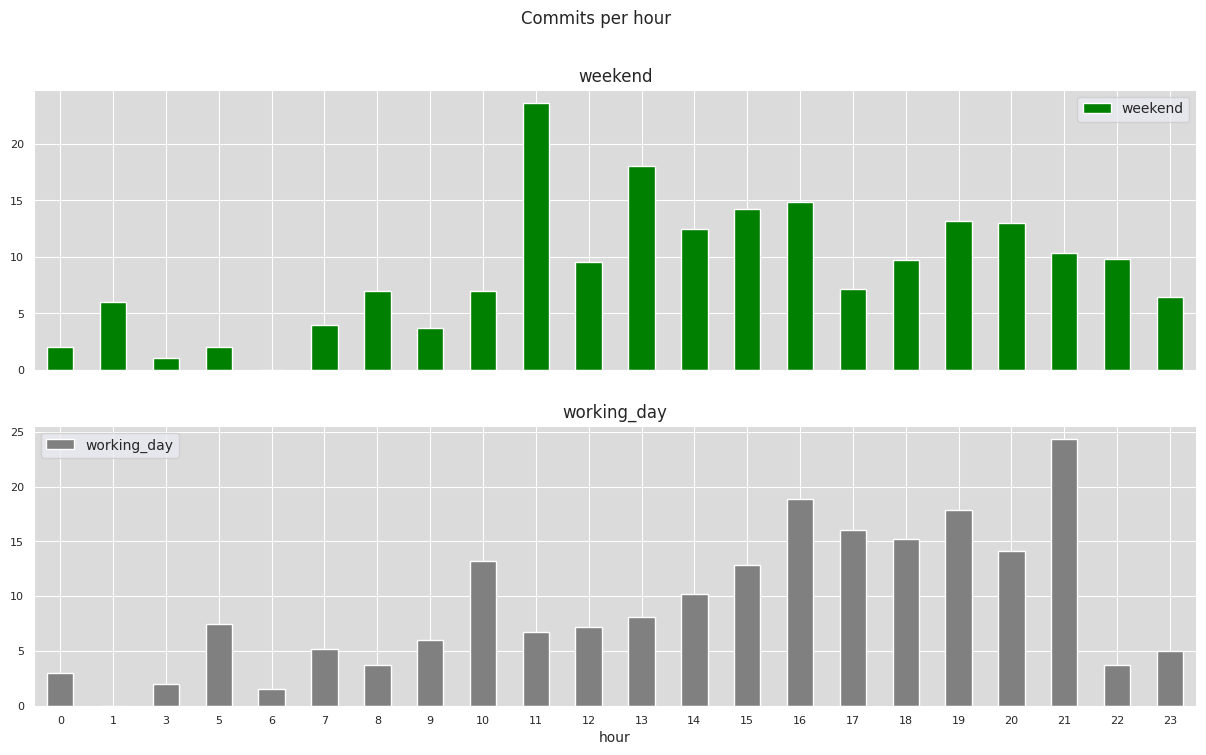

In [8]:
ax = pivot_table.plot(kind='bar', figsize=(15, 8), title='Commits per hour', rot=0, fontsize=8, color=['green', 'grey'], subplots=True)
ax[0].set_facecolor('#dbdbdb')
ax[1].set_facecolor('#dbdbdb')

In [9]:
pivot_table[pivot_table['working_day'] == pivot_table['working_day'].max()]

daytype,weekend,working_day
hour,,
21,10.285714,24.333333


In [10]:
pivot_table[pivot_table['weekend'] == pivot_table['weekend'].max()]

daytype,weekend,working_day
hour,,
11,23.6,6.769231


## Close the connection to the database

In [11]:
db_connect.close()